# Predicting Fetal Health from CTG-Data

## About

### Context

Reduction of child mortality is reflected in several of the United Nations' Sustainable Development Goals and is a key indicator of human progress.
The UN expects that by 2030, countries end preventable deaths of newborns and children under 5 years of age, with all countries aiming to reduce under‑5 mortality to at least as low as 25 per 1,000 live births.

Parallel to notion of child mortality is of course maternal mortality, which accounts for 295 000 deaths during and following pregnancy and childbirth (as of 2017). The vast majority of these deaths (94%) occurred in low-resource settings, and most could have been prevented.

In light of what was mentioned above, Cardiotocograms (CTGs) are a simple and cost accessible option to assess fetal health, allowing healthcare professionals to take action in order to prevent child and maternal mortality. The equipment itself works by sending ultrasound pulses and reading its response, thus shedding light on fetal heart rate (FHR), fetal movements, uterine contractions and more.

### Data

This dataset contains 2126 records of features extracted from Cardiotocogram exams, which were then classified by three expert obstetritians into 3 classes:

- Normal
- Suspect
- Pathological

### How to Use

Create a multiclass model to classify CTG features into the three fetal health states.


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import classification_report

from utils.FHPipeline import FHPipeline

In [17]:
data = pd.read_csv('fetal_health.csv')
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [19]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


## Data Exploration

### The Features

- 'baseline value' baseline of the fetal heart rate (beats per minute)
- 'accelerations' per second
- 'fetal_movement' no. of fetal movements per second
- 'uterine_contractions' no. of uterine contractions per second
- 'light_decelerations' no. of light decelerations per second
- 'severe_decelerations' no. of severe decelerations per second
- 'prolongued_decelerations' no. of prolongued decelerations per second
- 'abnormal_short_term_variability' percentage of time with abnormal short term variability, high or low
- 'mean_value_of_short_term_variability'
- 'percentage_of_time_with_abnormal_long_term_variability'
- 'mean_value_of_long_term_variability'
- 'histogram_width'
- 'histogram_min'
- 'histogram_max'
- 'histogram_number_of_peaks'
- 'histogram_number_of_zeros'
- 'histogram_mode'
- 'histogram_mean'
- 'histgram_median'
- 'histgogram_variance'
- 'histogram_tendency'

### Target

- 'fetal_health' 3 categories: 1 (Normal), 2 (Suspect), 3 (Pathological)


In [20]:
print(data.fetal_health.value_counts())
print("Normalized:")
print(data.fetal_health.value_counts(normalize=True))

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64
Normalized:
1.0    0.778457
2.0    0.138758
3.0    0.082785
Name: fetal_health, dtype: float64


<AxesSubplot:xlabel='fetal_health', ylabel='count'>

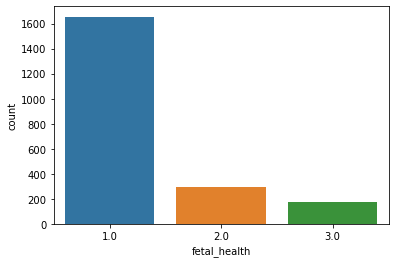

In [21]:
sns.countplot(data=data, x='fetal_health')

Data is highly imbalanced, has to be adressed during training of the model (possible imputation of data, selecting a balanced training sample?).


<AxesSubplot:>

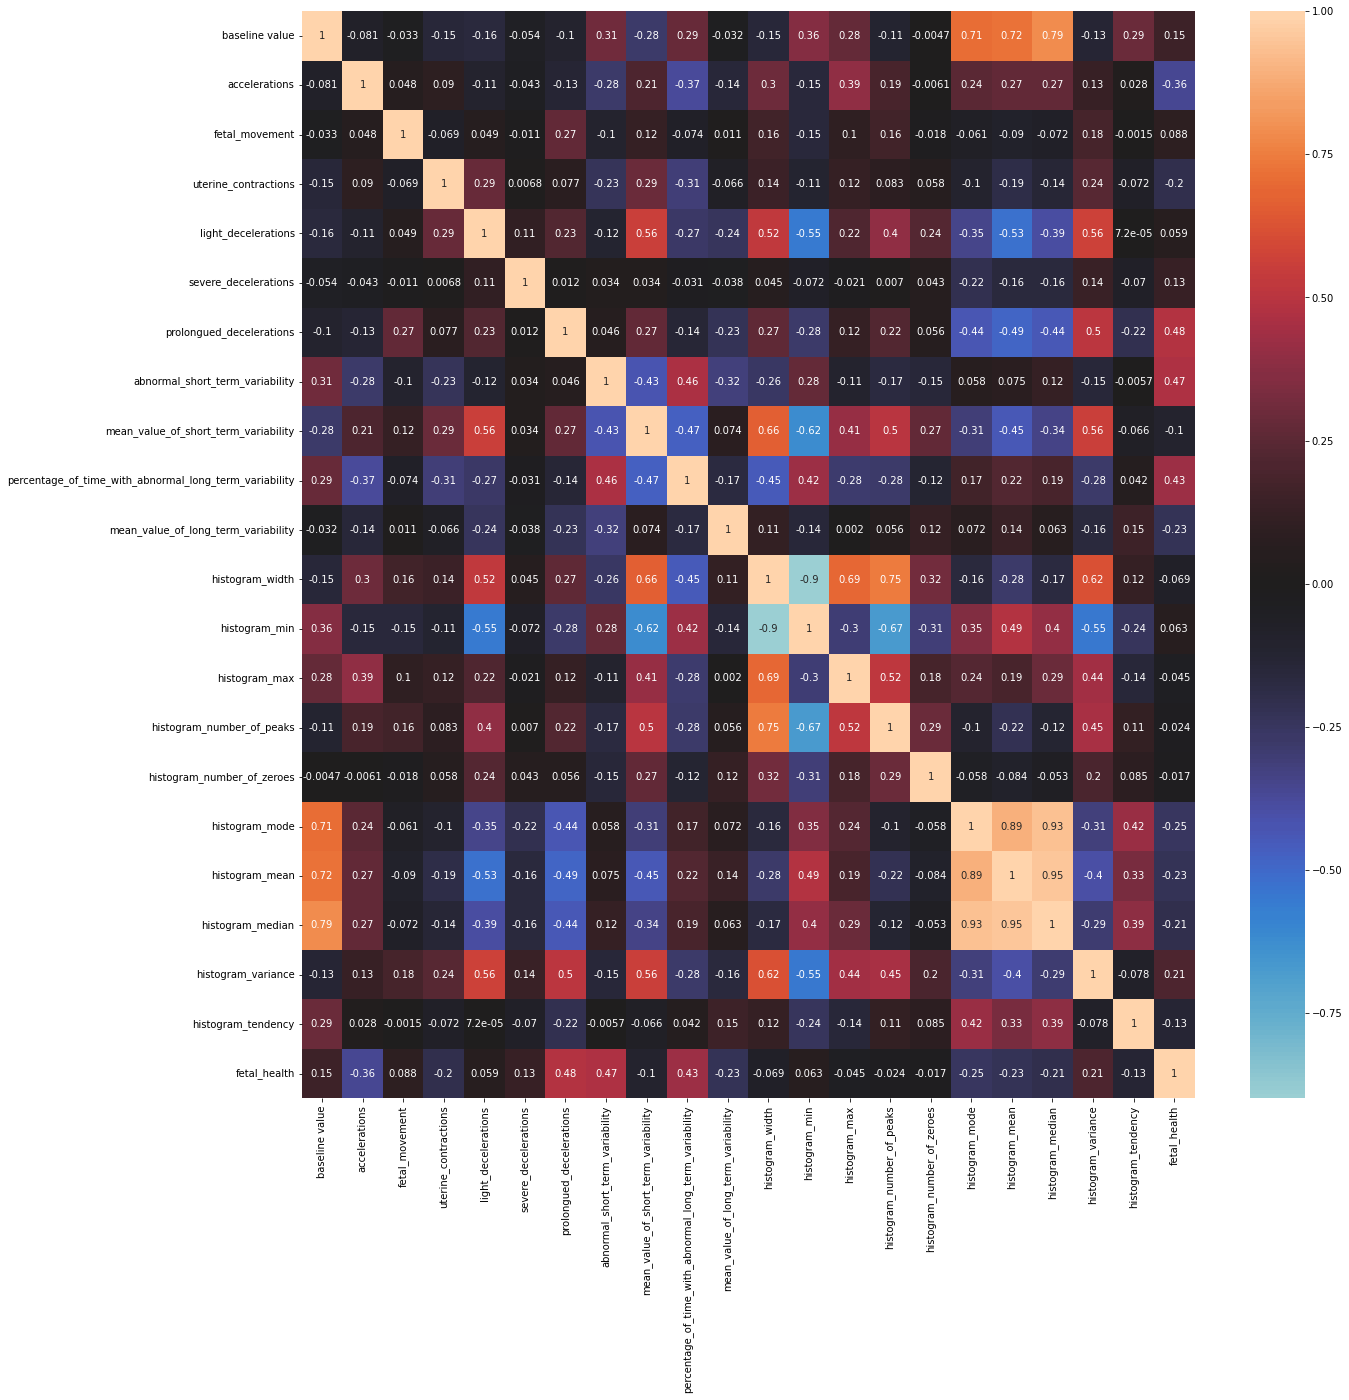

In [22]:
corr = data.corr()
plt.figure(figsize=(20,20))

sns.heatmap(corr, annot=True, center=0)

### Collinearities

- Strong collinearity between histogram_mode, mean and median as expected, since mode correlates most with the target variable, I will choose that as feature.
- histogram_width shows strong collinearity with several other features. I prefer to feed the 'raw' data to the models so I will drop histogram_width

Some features describing similar metrics show collinearity, e.g. histogram_min and light_decelerations. Both of these touch on the subject of 'low heart frequency in the fetus'. However, these are different metrics whatsoever and not necessarily connected to each other. A fetus can show a short bradycardia with low heart frequency yet light_decelerations can be rare nonetheless. So I will keep both of these featurs for now. However, if the models show overfitting later on, I will keep these features in mind as a possible source for that.


In [23]:
data.drop(columns=['histogram_mean', 'histogram_median', 'histogram_width'], inplace=True)

# Machine Learning

## Preparing the Data


In [25]:
X = data.drop(columns=['fetal_health'])
y = data['fetal_health']


fh_pipeline = FHPipeline(X, y, SEED = 31)
fh_pipeline

Next I will test out some of the different classifiers available on this dataset and measure their performance without anz feature engineering. This way, I hope to get an unbiased selection of the best performing classifiers and then be able to select the best ones to further boost their performance using feature selection and engineering.

## Linear Classifier

### Logistic Regression

First, I will try some linear classifiers. Let's start this off with simple logistic regression.


Scores for LogisticRegression
Maximum Score:  0.9294117647058824
Minimum Score:  0.8705882352941177
Mean Score:  0.8923529411764706
              precision    recall  f1-score   support

         1.0       0.94      0.95      0.94       335
         2.0       0.63      0.59      0.61        54
         3.0       0.83      0.78      0.81        37

    accuracy                           0.89       426
   macro avg       0.80      0.78      0.79       426
weighted avg       0.89      0.89      0.89       426



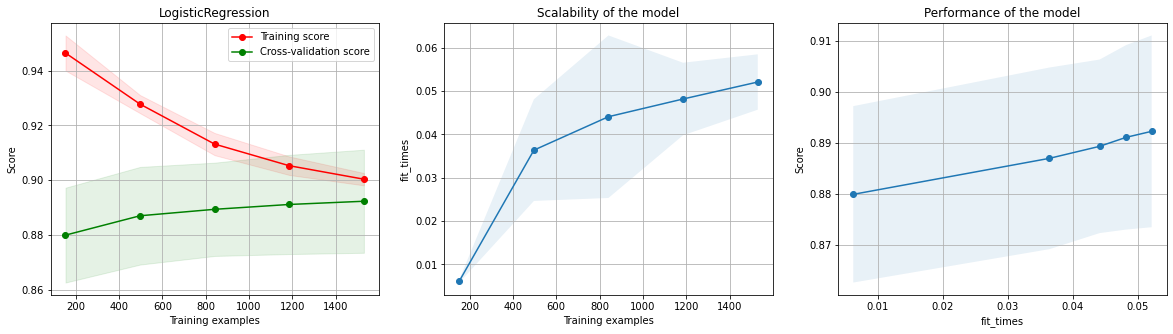

In [26]:
lr = LogisticRegression()
fh_pipeline.simple_fit_score(model=lr, n=10)
fh_pipeline.get_classification_report(model=lr)
fh_pipeline.plot_learning_curve(lr, 'LogisticRegression', fh_pipeline.X_train, fh_pipeline.y_train, cv=10)
plt.show()

### K-Nearest Neighbours

Scores for KNeighborsClassifier
Maximum Score:  0.9470588235294117
Minimum Score:  0.8470588235294118
Mean Score:  0.8988235294117647
              precision    recall  f1-score   support

         1.0       0.92      0.99      0.95       335
         2.0       0.82      0.52      0.64        54
         3.0       0.97      0.81      0.88        37

    accuracy                           0.91       426
   macro avg       0.90      0.77      0.82       426
weighted avg       0.91      0.91      0.91       426



<module 'matplotlib.pyplot' from '/Users/christian/opt/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

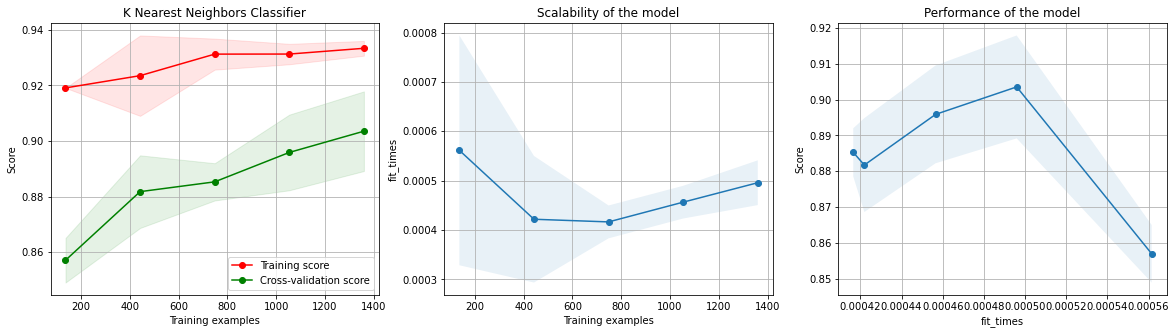

In [27]:
from sklearn.neighbors import KNeighborsClassifier as KNC

knc = KNC()
fh_pipeline.simple_fit_score(knc, 10)
fh_pipeline.get_classification_report(model=knc)
fh_pipeline.plot_learning_curve(knc, 'K Nearest Neighbors Classifier', fh_pipeline.X_train, fh_pipeline.y_train)

### SVM

Scores for SVC
Maximum Score:  0.9411764705882353
Minimum Score:  0.8764705882352941
Mean Score:  0.9094117647058824
              precision    recall  f1-score   support

         1.0       0.93      0.97      0.95       335
         2.0       0.67      0.61      0.64        54
         3.0       0.97      0.78      0.87        37

    accuracy                           0.91       426
   macro avg       0.86      0.79      0.82       426
weighted avg       0.90      0.91      0.90       426



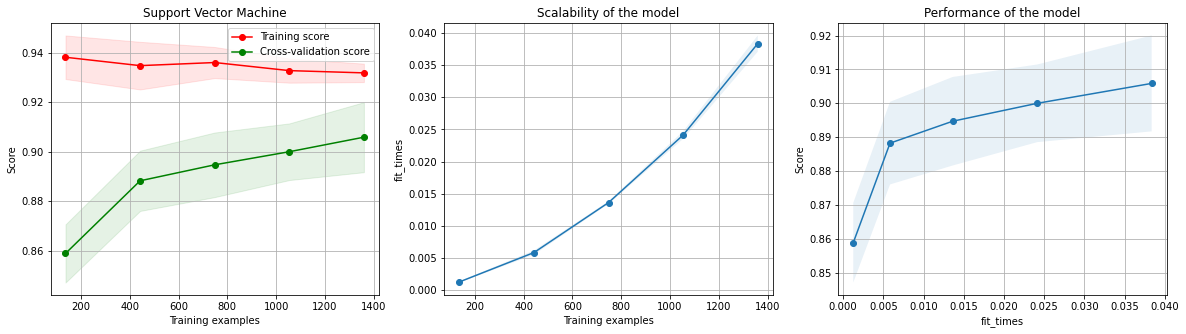

In [28]:
svc = SVC(kernel='rbf')
fh_pipeline.simple_fit_score(svc, 10)
fh_pipeline.get_classification_report(model=svc)
fh_pipeline.plot_learning_curve(svc, 'Support Vector Machine', fh_pipeline.X_train, fh_pipeline.y_train)
plt.show()

## Tree Based Models

### Decision Tree


Scores for DecisionTreeClassifier
Maximum Score:  0.9588235294117647
Minimum Score:  0.8705882352941177
Mean Score:  0.9076470588235296
              precision    recall  f1-score   support

         1.0       0.94      0.95      0.94       335
         2.0       0.71      0.59      0.65        54
         3.0       0.80      0.95      0.86        37

    accuracy                           0.90       426
   macro avg       0.82      0.83      0.82       426
weighted avg       0.90      0.90      0.90       426



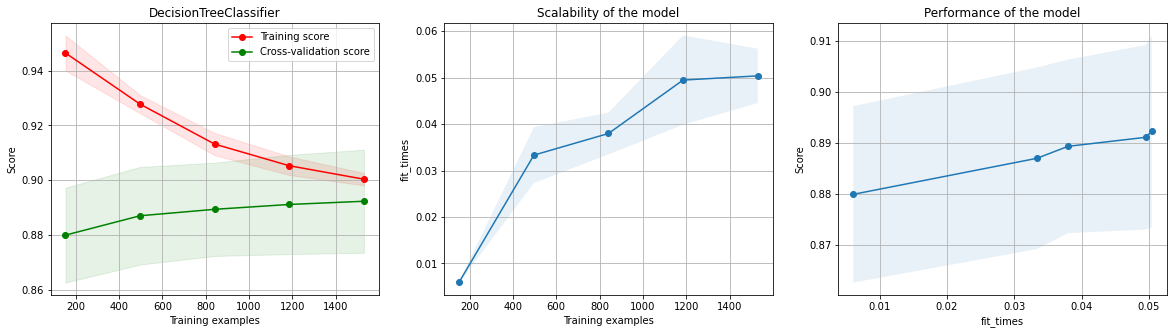

In [29]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
fh_pipeline.simple_fit_score(model=dt, n=10)
fh_pipeline.get_classification_report(model=dt)
fh_pipeline.plot_learning_curve(lr, 'DecisionTreeClassifier', fh_pipeline.X_train, fh_pipeline.y_train, cv=10)
plt.show()


### Random Forest

Scores for RandomForestClassifier
Maximum Score:  0.9705882352941176
Minimum Score:  0.9117647058823529
Mean Score:  0.9423529411764706
baseline value                                            0.046636
accelerations                                             0.048488
fetal_movement                                            0.025278
uterine_contractions                                      0.043660
light_decelerations                                       0.014303
severe_decelerations                                      0.000912
prolongued_decelerations                                  0.066312
abnormal_short_term_variability                           0.151457
mean_value_of_short_term_variability                      0.117395
percentage_of_time_with_abnormal_long_term_variability    0.150879
mean_value_of_long_term_variability                       0.061240
histogram_min                                             0.050031
histogram_max                                             0.

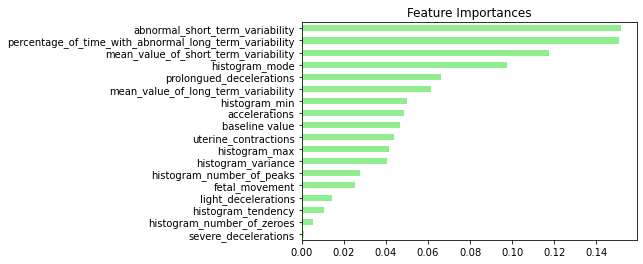

              precision    recall  f1-score   support

         1.0       0.96      0.99      0.97       335
         2.0       0.91      0.78      0.84        54
         3.0       0.92      0.95      0.93        37

    accuracy                           0.96       426
   macro avg       0.93      0.90      0.92       426
weighted avg       0.95      0.96      0.95       426



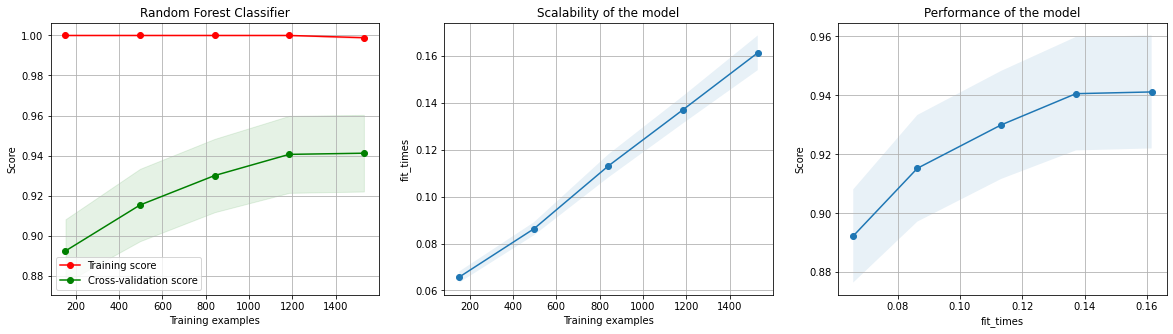

In [30]:
from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier()
fh_pipeline.simple_fit_score(model=rf, n=10, importance=True)
fh_pipeline.get_classification_report(model=rf)
fh_pipeline.plot_learning_curve(rf, 'Random Forest Classifier', fh_pipeline.X_train, fh_pipeline.y_train, cv=10)
plt.show()

### AdaBoost

Scores for AdaBoostClassifier
Maximum Score:  0.9705882352941176
Minimum Score:  0.9058823529411765
Mean Score:  0.9352941176470588
              precision    recall  f1-score   support

         1.0       0.96      0.97      0.97       335
         2.0       0.82      0.78      0.80        54
         3.0       0.89      0.92      0.91        37

    accuracy                           0.94       426
   macro avg       0.89      0.89      0.89       426
weighted avg       0.94      0.94      0.94       426



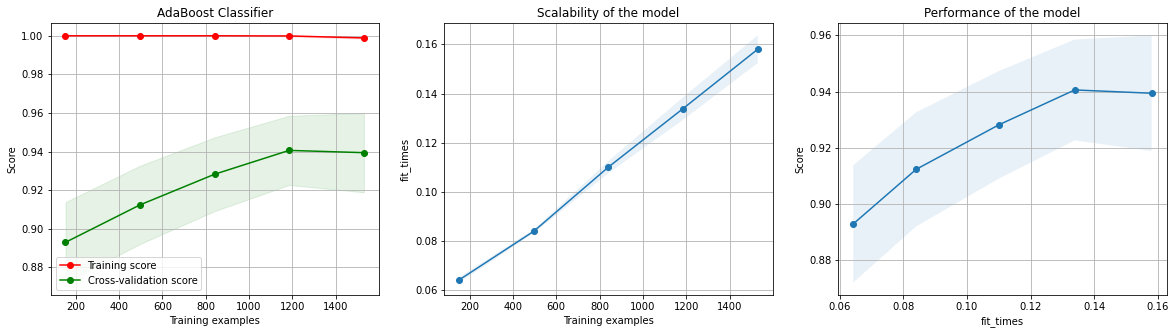

In [34]:
from sklearn.ensemble import AdaBoostClassifier

dt_ = DecisionTreeClassifier(max_depth=4, random_state=42)
ada = AdaBoostClassifier(base_estimator=dt_, n_estimators=200, random_state=42)
fh_pipeline.simple_fit_score(model=ada, n=10, importance=False)
fh_pipeline.get_classification_report(model=ada)
fh_pipeline.plot_learning_curve(rf, 'AdaBoost Classifier', fh_pipeline.X_train, fh_pipeline.y_train, cv=10)
plt.show()

Scores for AdaBoostClassifier
Maximum Score:  0.9705882352941176
Minimum Score:  0.9058823529411765
Mean Score:  0.9352941176470588
              precision    recall  f1-score   support

         1.0       0.96      0.97      0.97       335
         2.0       0.82      0.78      0.80        54
         3.0       0.89      0.92      0.91        37

    accuracy                           0.94       426
   macro avg       0.89      0.89      0.89       426
weighted avg       0.94      0.94      0.94       426



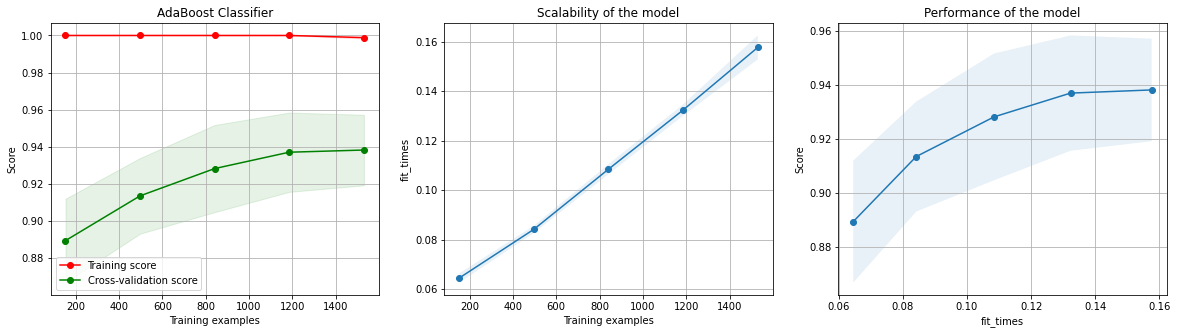

In [35]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=250, max_depth=1, random_state=42)
fh_pipeline.simple_fit_score(model=ada, n=10, importance=False)
fh_pipeline.get_classification_report(model=ada)
fh_pipeline.plot_learning_curve(rf, 'AdaBoost Classifier', fh_pipeline.X_train, fh_pipeline.y_train, cv=10)
plt.show()

### XGBoost

In [74]:
import xgboost as xgb
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import LabelEncoder


model = xgb.XGBClassifier()
params = model.get_xgb_params()
params["num_class"] = 4
params["objective"] = "multi:softmax"
params["eval_metric"] = "merror"
print(params)
enc = LabelEncoder()

y_enc = enc.fit_transform(y)
# Create the DMatrix from X and y: churn_dmatrix
fetal_dmatrix = xgb.DMatrix(data=X, label=y_enc)

# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=fetal_dmatrix, params=params, 
                  nfold=10, num_boost_round=10, 
                  metrics="merror", as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Print the accuracy
print(((1-cv_results["test-merror-mean"]).iloc[-1]))



{'objective': 'multi:softmax', 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'gamma': None, 'gpu_id': None, 'interaction_constraints': None, 'learning_rate': None, 'max_delta_step': None, 'max_depth': None, 'min_child_weight': None, 'monotone_constraints': None, 'n_jobs': None, 'num_parallel_tree': None, 'predictor': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None, 'num_class': 4, 'eval_metric': 'merror'}


/Users/christian/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


   train-merror-mean  train-merror-std  test-merror-mean  test-merror-std
0           0.040086          0.002930          0.063967         0.012471
1           0.037107          0.002785          0.065374         0.013027
2           0.031985          0.001749          0.066315         0.008731
3           0.028118          0.002505          0.064913         0.012428
4           0.025086          0.001810          0.064439         0.009414
5           0.022107          0.001280          0.063033         0.011385
6           0.018815          0.001323          0.062565         0.011937
7           0.016411          0.001263          0.061620         0.010830
8           0.014843          0.001242          0.059740         0.011552
9           0.013066          0.001147          0.059740         0.011934
0.9402602


[15:50:36] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


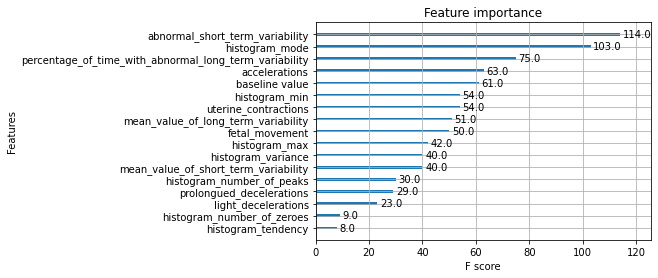

In [85]:
params = {'objective': 'multi:softmax', 'num_class': 3}
xgb_clf = xgb.train(params = params, dtrain=fetal_dmatrix, num_boost_round=10)
xgb.plot_importance(xgb_clf)
plt.show()